In [1]:
using Eirene
using MAT
using LinearAlgebra
using Statistics
using Printf
using PyPlot
using Distributions
using Random

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-16767354193460926377\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11158730613499150089\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-16767354193460926377\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

# Data load

## Embedded

In [3]:
n = 20

20

In [4]:
vars = matread(string("test_matrices/",n,"_wsbm_embedded.mat"))

Dict{String,Any} with 1 entry:
  "wsbm_emb" => [0.666667 0.572213 … 0.0551458 0.0166386; 0.572213 1.0 … 0.1895…

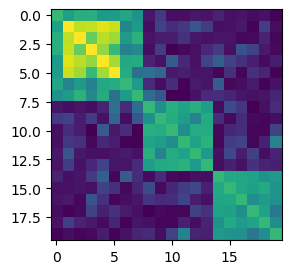

PyObject <matplotlib.image.AxesImage object at 0x15bdce1d0>

In [5]:
wsbm_emb = vars["wsbm_emb"];
plt.figure(figsize=(3,3))
imshow(wsbm_emb)

### TDA part

In [2]:
function get_distance(matrix)
   
    distC = ((matrix.-1).*(-1)).^0.5;
    distC[diagind(distC)].= 0; 
    return distC
end 
function TDA(matrix)
    dist_mat=get_distance(matrix)
    C=eirene(dist_mat,maxdim=1)
    return C
end
function write_barcode_to_file(C, filename; maxdim = 2)

    open(filename,"w") do f
        
        for dim in collect(0:maxdim)
        
            b = barcode(C, dim = dim)
            num = size(b)[1]
        
            write(f,string("Dimension: ", dim,"\n"))
            #println(string("Dimension: ", dim,"\n"))
                  
            
            for j in collect(1:num)
    
                ints = @sprintf "[%.3f, %.3f): " b[j,1] b[j,2]
                repr = classrep(C, class = j, dim = dim)
                part1 = @sprintf "[%.3f, %.3f): " b[j,1] b[j,2]
            
                simplList = []
                for i in collect(1:size(repr)[2]) 
                    push!(simplList,"["*join(string.(repr[:,i]),",")*"]")
                end 
            
                part2 = string(part1, join(simplList,"+"),"\n")
                write(f,part2)
            end
        end
        
    end
end

write_barcode_to_file (generic function with 1 method)

## TDA part

In [6]:
C=TDA(wsbm_emb);
filename = string("ints/ints_",n,"embed", ".txt")
write_barcode_to_file(C, filename, maxdim = 1)

## Mixed

In [20]:
vars = matread(string("test_matrices/",n,"_wsbm_mixed.mat"))

Dict{String,Any} with 1 entry:
  "wsbm_mixed" => [0.508917 0.860473 … 0.140689 0.257705; 0.860473 0.508917 … 0…

In [21]:
wsbm_mixed = vars["wsbm_mixed"];

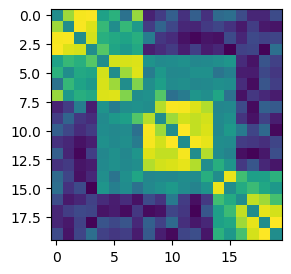

PyObject <matplotlib.image.AxesImage object at 0x16a9ef450>

In [22]:
plt.figure(figsize=(3,3))
imshow(wsbm_mixed)

In [23]:
C=TDA(wsbm_mixed);
filename = string("ints/ints_",n,"_mixed", ".txt")
write_barcode_to_file(C, filename, maxdim = 1)

## Simple block

In [13]:
vars = matread(string("test_matrices/",n,"_wsbm_base_0.4_0.3_3_3.mat"))

Dict{String,Any} with 1 entry:
  "wsbm_base" => [1.0 0.995915 … 0.0297184 0.0229773; 0.995915 1.0 … 0.0277904 …

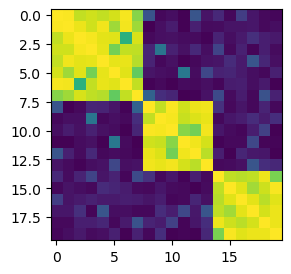

PyObject <matplotlib.image.AxesImage object at 0x16a92db90>

In [14]:
vars = matread(string("test_matrices/",n,"_wsbm_base_0.4_0.3_3_3.mat"))
wsbm_strong = vars["wsbm_base"];
plt.figure(figsize=(3,3))
imshow(wsbm_strong)

In [15]:
C=TDA(wsbm_strong);
filename = string("ints/ints_",n,"_strong", ".txt")
write_barcode_to_file(C, filename, maxdim = 1)

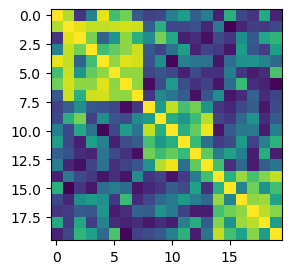

PyObject <matplotlib.image.AxesImage object at 0x1688f8ed0>

In [16]:
vars = matread(string("test_matrices/",n,"_wsbm_base_0.4_0.3_1_1.mat"))
wsbm_medium = vars["wsbm_base"];
plt.figure(figsize=(3,3))
imshow(wsbm_medium)

In [17]:
C=TDA(wsbm_medium);
filename = string("ints/ints_",n,"_medium", ".txt")
write_barcode_to_file(C, filename, maxdim = 1)

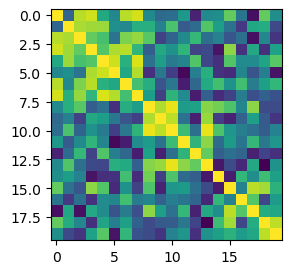

PyObject <matplotlib.image.AxesImage object at 0x16a99c1d0>

In [18]:
vars = matread(string("test_matrices/",n,"_wsbm_base_0.4_0.3_1_0.5.mat"))
wsbm_weak = vars["wsbm_base"];
plt.figure(figsize=(3,3))
imshow(wsbm_weak)

In [19]:
C=TDA(wsbm_weak);
filename = string("ints/ints_",n,"_weak", ".txt")
write_barcode_to_file(C, filename, maxdim = 1)